In [4]:

from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np

In [5]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
# y 데이터 분포 확인
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
# 정규화 
x_train = x_train / 255
x_test = x_test / 255

In [9]:
# Target을 one-hot-encoding
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layer=Conv2D(32, (3,3), padding='same',
                       activation='relu', strides=(1,1),
                       input_shape=(28,28,1)))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=2))
# model.summary()

model.add(layer=Conv2D(filters=64, kernel_size=(3,3), padding='same',
                       activation='relu', strides=(1,1)))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=2))
# model.summary()

model.add(layer=Flatten())
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [18]:
from tensorflow.keras import callbacks

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')
modelCheckPoint = callbacks.ModelCheckpoint('best.h5')

In [20]:
hist = model.fit(x_train, y_train, epochs=10, 
                 callbacks=[modelCheckPoint],
                 validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0643 - acc: 0.9764 - val_loss: 0.3097 - val_acc: 0.9232
Epoch 2/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0497 - acc: 0.9814 - val_loss: 0.3809 - val_acc: 0.9190
Epoch 3/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0475 - acc: 0.9827 - val_loss: 0.3834 - val_acc: 0.9138
Epoch 4/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0368 - acc: 0.9866 - val_loss: 0.3765 - val_acc: 0.9202
Epoch 5/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0354 - acc: 0.9868 - val_loss: 0.4101 - val_acc: 0.9153
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0328 - acc: 0.9882 - val_loss: 0.4123 - val_acc: 0.9120
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0280 - acc: 0.9904 - val_loss: 0.5197 - val_acc: 0.9128
Epoch 8/10
1500/1500 [==========================

In [21]:
model.load_weights('best.h5')
# model = models.loadModel('best.h5)

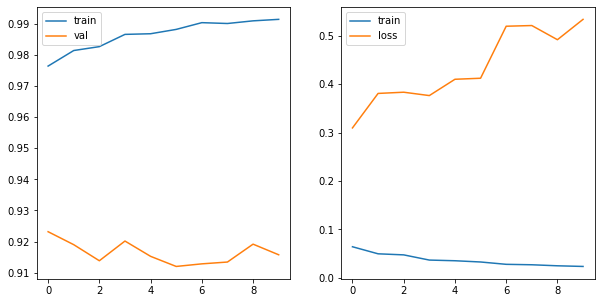

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train', 'val'])

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train', 'loss'])

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5890 - acc: 0.9143


[0.5889604687690735, 0.9143000245094299]

In [24]:
# Prediction
classes = ['T-Shirt/top',
           'Trouser',
           'Pullover',
           'Dress',
           'Coat',
           'Sandal',
           'Shirt',
           'Sneaker',
           'Bag',
           'Ankle boot']

In [33]:
pred = model.predict(x_test[115:180])
print(np.round(pred, 2))

[[0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.  

In [34]:
print(np.argmax(pred, axis=1))

[2 8 4 7 8 0 0 9 9 3 0 8 4 1 5 4 1 9 1 8 6 2 1 2 5 1 0 0 0 1 6 1 3 2 2 3 4
 1 3 5 0 4 7 9 3 7 2 3 9 0 9 2 7 4 2 0 5 2 1 2 1 3 0 9 1]


In [36]:
print(np.argmax(y_test[115:180], axis=1))

[2 8 6 7 8 0 0 9 9 3 0 8 4 1 5 4 1 9 1 8 6 2 1 2 5 1 0 0 0 1 6 1 6 2 2 4 4
 1 4 5 0 4 7 9 3 7 2 3 9 0 9 4 7 4 2 0 5 2 1 2 1 3 0 9 1]
